<a href="https://colab.research.google.com/github/satyasri77/Segment_anything/blob/main/Segement_anything_meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.3 MB/s eta 0:00:00


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import gc

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()
     

In [ ]:
import transformers
from transformers import pipeline
generator = pipeline("mask-generation", model="facebook/sam-vit-huge")

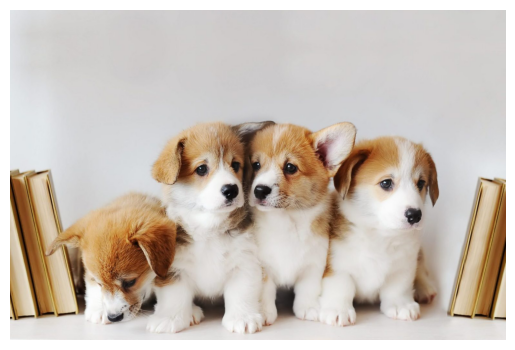

In [21]:
from PIL import Image
import requests

# img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
# raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

image = "/GettyImages-1133605325-scaled-e1617227898456.jpg"
raw_image = Image.open(image).convert("RGB")
plt.axis('off')
plt.imshow(raw_image)

In [ ]:
outputs = generator(raw_image, points_per_batch=64)

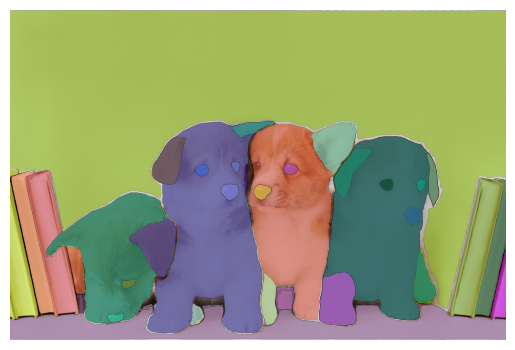

In [ ]:
masks = outputs["masks"]
show_masks_on_image(raw_image, masks)